# <b>와인 품질 모니터링 시스템</b>

<img src="https://user-images.githubusercontent.com/60165706/99513633-312d8280-29ce-11eb-987f-052c301853be.png" align="center"/>

## <b>와인 데이터 EDA</b> 

- <h3> <b>와인데이터 칼럼 이름</b></h3>
    1. fixed acidity 주석산 농도
    2. volatile acidity 아세트산 농도
    3. citric acid 구연산 농도
    4. residual sugar 잔류 당분 농도
    5. chlorides 염화나트륨 농도
    6. free sulfur dioxide 유리 아황산 농도
    7. total sulfur dioxide 총 아황산 농도
    8. density 밀도
    9. ph 수소이온농도(산성/알칼리성)
    10. sulphates 황산염
    11. alcohol 알코올 농도
    12. quality 와인의 맛 0 ~ 10등급 quality -> 6.5 부터 맛있다.
    13. class 1: 레드와인 0: 화이트와인

&nbsp;
- ### <b>와인데이터 칼럼 설명</b>
<b>pH (수소이온 지수)</b>
     
     
     - ph가 낮을수록 미생물에 대한 저항력이 강해지지만 신맛이 강해짐
     
     - 산성: 신맛이 남    
     
     - 알칼리성: 쓴맛이 남

<b>fixed acidity (주석상 농도)</b>
 
     - 와인의 pH 수치를 낮춰주는 역할을 함
     
     - 와인을 마실 때 좋지 않은 감촉을 유발
     
     - 포도에 다량 존재하는 산
 
<b>volatile acidity (아세트산 농도)</b>
    
     - 식초냄세를 유발
      
     - 식초의 성분임

<b>citric acid (구연산 농도)</b>
     
     - 상쾌한 맛을 선사함
    
     - 감귤류에 다량 존재하는 산
    
     - 포도에는 많지 않음

<b>residual sugar (잔류 당분 농도)</b>    
   
     - 당도

<b>chlorides (염화나트륨 농도)</b>
     
     - 얼음을 물로 만들어주는 성질
     
     - 수분의 어는 점을 낮춰서 와인을 장기간 보관할 수 있게 해줌

 <b>sulfur dioxide (아황산 농도)</b>   
     
     - 황산염의 분해작용을 통해 발생하는 성분
     
     - 산화방지
     
     - 살균작용
     
     - 갈변 방지 등

 <b>sulphates (황산염)</b> 
 
 <b>density (밀도)</b>
    
    - 와인을 마신 뒤 느껴지는 입안을 가득 채운 풍만감 정도

- ### <b>EDA in python</b>

In [257]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [258]:
df = pd.read_excel('wine.xlsx', header=None)
df = df.iloc[:,1:len(df.columns)]
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
              'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alchol','quality', 'class']

In [259]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [260]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alchol                  0
quality                 0
class                   0
dtype: int64

In [261]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alchol                  float64
quality                   int64
class                     int64
dtype: object

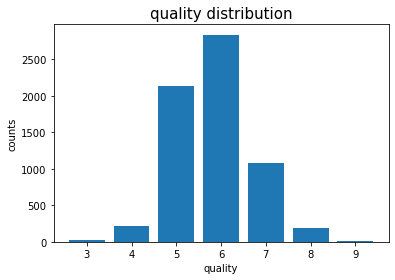

In [262]:
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts())
plt.title('quality distribution', fontsize=15)
plt.xlabel('quality')
plt.ylabel('counts')
plt.show()



#### quality 변수를 보니까 카테고리가 너무 많다.

1~10을 1-3으로 축소

- 1~3 -> 1 : 맛이 없다.
- 4~6 -> 2 : 먹을만 하다.
- 7~10 -> 3 : 맛있다.

In [263]:
for i in range(len(df)):
    if df['quality'][i] <= 3:
        df['quality'][i] = 1
    elif df['quality'][i] >=4 and df['quality'][i] <=6:
        df['quality'][i] = 2
    else:
        df['quality'][i] = 3

df['quality'].value_counts()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2    5190
3    1277
1      30
Name: quality, dtype: int64

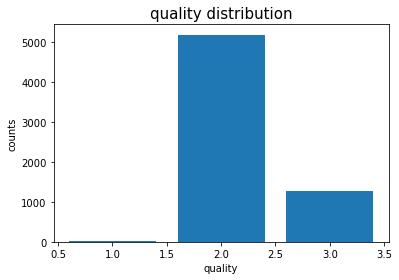

In [264]:
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts())
plt.title('quality distribution', fontsize=15)
plt.xlabel('quality')
plt.ylabel('counts')
plt.show()


#### quality, class는 factor타입인 것을 알 수 있음

In [265]:
df['quality'] = df['quality'].astype('category')
df['class'] = df['class'].astype('category')

df.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alchol                   float64
quality                 category
class                   category
dtype: object

&nbsp;

- ### <b>PCA를 이용한 EDA</b>

In [266]:
# numeric타입만 추출
numeric_df = df.iloc[:,0:10]
numeric_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
dtype: object

In [267]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# scale 작업
scaled = StandardScaler().fit_transform(numeric_df) # 평균을 0으로 scaling

In [268]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(scaled)


## 파이썬에서는 따로 biplot을 제공하지 않음 직접 짜기엔 복잡 -> R 

<img src="https://user-images.githubusercontent.com/60165706/99487005-b867ff80-29a8-11eb-916b-9ecfe9a3a30c.png" height="500" width="500">

##### PCA를 이용해서 전체적으로 변수의 관계를 확인 후 ploting을 통해 세부적으로 보기

아래 그래프를 통해 free_sulfur_dioxide와 total_sulfur_dioxide는 깊은 양의 상관관계를 가짐을 볼 수 있다.

그렇기에 <strong>다중공선성</strong>을 고려해서 total_sulfur_dioxide 변수 하나만을 사용

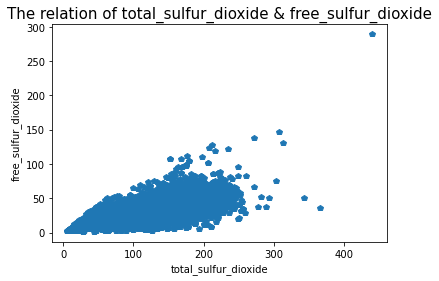

In [269]:
from matplotlib import pyplot as plt
plt.plot(df['total_sulfur_dioxide'], df['free_sulfur_dioxide'], marker='p', linestyle='none')
plt.title('The relation of total_sulfur_dioxide & free_sulfur_dioxide', fontsize=15)
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('free_sulfur_dioxide')
plt.show()

In [270]:
df = df.drop(['free_sulfur_dioxide'], axis=1)

&nbsp;

- ### <b>Decision Tree를 이용한 EDA</b>

In [271]:
from sklearn import tree
EDA_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [272]:
## 레드와인:1 화이트와인:0
red_wine = df[df['class'] == 1]
white_wine = df[df['class'] == 0]

In [273]:
# class 변수 제거
red_wine = red_wine.drop(['class'], axis=1)
white_wine = white_wine.drop(['class'], axis=1)

print(red_wine.columns)
print(white_wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates',
       'alchol', 'quality'],
      dtype='object')
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates',
       'alchol', 'quality'],
      dtype='object')


In [274]:
from sklearn.tree import export_graphviz
import graphviz
from os import system
from IPython.display import Image

In [275]:
## red_wine X, Y variable
red_wine_data = red_wine.iloc[:, 0:10]
red_wine_target = red_wine.iloc[:,10]

red_wine_feature_names = red_wine.columns[0:10]
red_wine_target_names = red_wine.columns[10]

In [276]:
## white_wine X, Y variable
white_wine_data = white_wine.iloc[:, 0:10]
white_wine_target = white_wine.iloc[:,10]

white_wine_feature_names = white_wine.columns[0:10]
white_wine_target_names = white_wine.columns[10]

In [277]:
## classification Tree
red_wine_tree_model = tree.DecisionTreeClassifier(criterion = "entropy")
white_wine_tree_model = tree.DecisionTreeClassifier(criterion = "entropy")

## red wine tree model
red_wine_tree_model = red_wine_tree_model.fit(red_wine_data, red_wine_target)

## white wine tree model
white_wine_tree_model = white_wine_tree_model.fit(white_wine_data, white_wine_target)

&nbsp; 

python path 오류로 인해 R로.. tree시각화

<img src="https://user-images.githubusercontent.com/60165706/99845163-8d072f80-2bb7-11eb-96a0-e86bf848c523.png" align="center"/>

#### <b>Tree 기반 중요 변수 추출</b>

- <b>red wine</b>

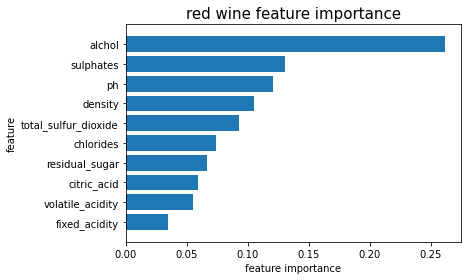

In [278]:
n_features = red_wine_data.shape[1]
plt.barh(range(n_features), sorted(red_wine_model.feature_importances_), align='center')
plt.yticks(np.arange(n_features), red_wine_feature_names)
plt.title('red wine feature importance', fontsize=15)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

- <b>white wine</b>

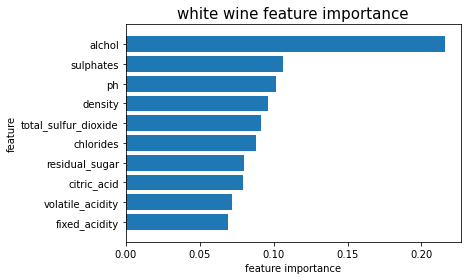

In [279]:
n_features = white_wine_data.shape[1]
plt.barh(range(n_features), sorted(white_wine_model.feature_importances_), align='center')
plt.yticks(np.arange(n_features), white_wine_feature_names)
plt.title('white wine feature importance', fontsize=15)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

In [280]:
# important data
important_red_wine = red_wine.iloc[:,6:10]
important_white_wine = white_wine.iloc[:,6:10]

&nbsp;

### <b>Residual based Anomaly detection</b>
#### using Hatmatrix & bootstrap

In [281]:
## matrix
red_wine_mat = np.array(important_red_wine)
white_wine_mat = np.array(important_white_wine)

print(red_wine_mat.shape)
white_wine_mat.shape

(1599, 4)


(4898, 4)

In [282]:
# red wine, white wine train_data
red_wine_train = red_wine_mat[0:1000,:]
white_wine_train = white_wine_mat[0:3000,:]

# red wine, white wine test_data
red_wine_test = red_wine_mat
white_wine_test = white_wine_mat

&nbsp;

#### <b>Model Based Anomaly Detection function</b>

In [283]:
# index function 
def idx(i):
    index = [0,1,2,3]
    index.remove(i)
    return index

In [284]:
import numpy.linalg as lin
def m_set_regress(train, test):
    # 초기값 선언
    y_hat_tr = np.zeros((train.shape[0], train.shape[1]))
    y_hat_ts = np.zeros((test.shape[0], test.shape[1]))
    
    # train data 학습
    for i in range(4):
        y_hat_tr[:,i] = train[:,idx(i)] @ lin.inv(train[:,idx(i)].transpose() @ train[:,idx(i)]) @  train[:,idx(0)].transpose() @ train[:,i]
    
    residual_tr =  train - y_hat_tr
  
    ## test data
    for i in range(4):
        y_hat_ts[:,i] = test[:,idx(i)] @ lin.inv(train[:,idx(i)].transpose() @ train[:,idx(i)]) @  train[:,idx(0)].transpose() @ train[:,i]
        
    residual_ts =  test - y_hat_ts

    return(residual_tr, residual_ts)

In [285]:
# red_wine train / test
red_wine_y_hat = m_set_regress(red_wine_train, red_wine_test)
red_wine_y_hat_tr = red_wine_y_hat[0]
red_wine_y_hat_ts = red_wine_y_hat[1]

# white_wine train / test
white_wine_y_hat = m_set_regress(white_wine_train, white_wine_test)
white_wine_y_hat_tr = white_wine_y_hat[0]
white_wine_y_hat_ts = white_wine_y_hat[1]

In [286]:
# red_wine
red_wine_y_hat_tr = pd.DataFrame(red_wine_y_hat_tr)
red_wine_y_hat_ts = pd.DataFrame(red_wine_y_hat_ts)

# white_wine
white_wine_y_hat_tr = pd.DataFrame(white_wine_y_hat_tr)
white_wine_y_hat_ts = pd.DataFrame(white_wine_y_hat_ts)

In [287]:
var = ['alchol', 'sulphates', 'ph', 'density']
red_wine_y_hat_tr.columns = var
red_wine_y_hat_ts.columns = var
white_wine_y_hat_tr.columns = var
white_wine_y_hat_ts.columns = var

&nbsp;

#### <b>Bootstrap function</b>

In [288]:
# m: sample 수
def bootlimit(stat, alpha, m):
    ucl_mat = []
    lcl_mat = []

    for i in range(m):
        sample_temp = stat.sample(n=len(stat), replace=True)
        ucl = sample_temp.quantile(q=(1-alpha))
        lcl = sample_temp.quantile(alpha)
        ucl_mat.append(ucl)
        lcl_mat.append(lcl)
    ucl = np.mean(ucl_mat)
    lcl = np.mean(lcl_mat)
    
    return(ucl, lcl)

In [289]:
def col_boot_limits(stat, alpha, m):
    limits = np.zeros((2, stat.shape[1]))
    for i in range(stat.shape[1]):
        cl = bootlimit(stat.iloc[:,i], alpha, m)
        limits[0,i] = cl[0]
        limits[1,i] = cl[1]
    
    return(limits)

In [290]:
red_wine_limit = col_boot_limits(red_wine_y_hat_ts, 0.05, 100)
white_wine_limit = col_boot_limits(white_wine_y_hat_ts, 0.05, 100)

In [291]:
print('red_wine Limit')
for i in range(4):
    print(red_wine_limit[:,i])

print()
print('white_wine Limit')
for i in range(4):
    print(white_wine_limit[:,i])    

red_wine Limit
[ 0.06282555 -0.07535854]
[155.48674767 -92.77795341]
[ 75.94980472 -64.50791329]
[ 1039.79637957 -1094.81005779]

white_wine Limit
[ 0.07421348 -0.07548761]
[ 141.69136568 -102.25515191]
[ 50.09410141 -50.33604689]
[ 1691.074098   -2063.53749292]


&nbsp;
### <b>데이터 시각화</b>

In [292]:
def wine_monitoring(y_hat_ts, limit, category, outlier=False):
    fig,ax = plt.subplots(4,1)
    plt.subplots_adjust(left=1,
                    bottom=0.05, 
                    right=3, 
                    top=1.5, 
                    wspace=0.5, 
                    hspace=0.5)
    if category == 'red_wine':
        ax[0].set_title('Red Wine monitoring System', fontsize=15)
     
    elif category == 'white_wine':
        ax[0].set_title('White Wine monitoring System', fontsize=15)
              
    for i in range(4):
        ax[i].plot(y_hat_ts.iloc[:,i],'black',lw=1)
        ax[i].axhline(y=limit[0,i], color='r', linewidth=1)
        ax[i].axhline(y=limit[1,i], color='r', linewidth=1)
        ax[i].set_ylabel(var[i])
        ax[i].set_xlabel('time')
        
        if outlier==True:
            ucl_idx = y_hat_ts[y_hat_ts.iloc[:,i]> limit[0,i]].index   
            for j in range(len(ucl_idx)):      
                    ax[i].axvline(x=ucl_idx[j], color='r', linestyle='-')

            lcl_idx = y_hat_ts[y_hat_ts.iloc[:,i]> limit[0,i]].index   
            for j in range(len(ucl_idx)):      
                    ax[i].axvline(x=ucl_idx[j], color='r', linestyle='-')

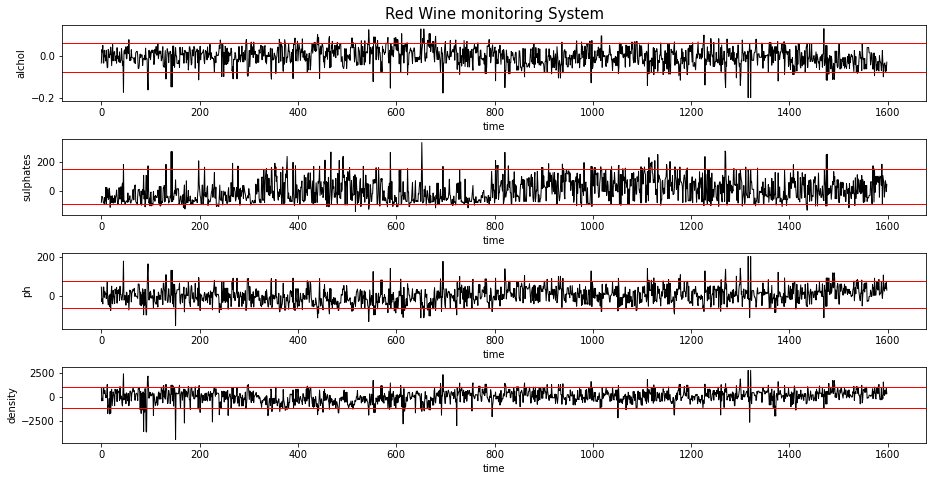

In [293]:
wine_monitoring(red_wine_y_hat_ts, red_wine_limit, 'red_wine', outlier=False)

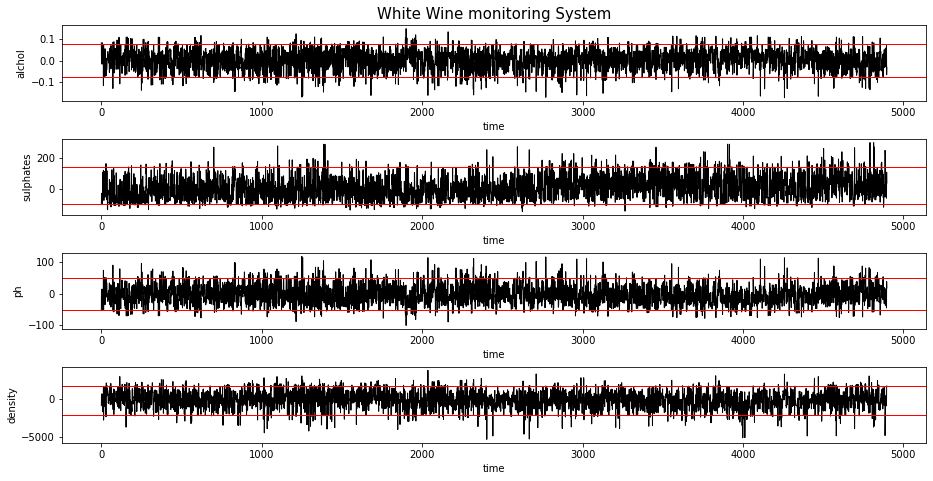

In [294]:
wine_monitoring(white_wine_y_hat_ts, white_wine_limit, 'white_wine', outlier=False)

### <b>보완점</b>

- EDA 고도화
- 모델링 최적화
- class 불균형 문제